In [1]:
import sys
sys.path.append('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/')
import bart
import numpy as np

In [2]:
from pystan import StanModel
import pickle
#sm = StanModel('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3.stan')
#pickle.dump(sm, open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3.pkl','wb'))
sm = pickle.load(open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3.pkl','rb'))

In [ ]:
from pystan import StanModel
import pickle
sm = StanModel('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3_softmax.stan')
pickle.dump(sm, open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3_softmax.pkl','wb'))
sm = pickle.load(open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3_softmax.pkl','rb'))

In [5]:
i_max = 100
rewards = np.array([2*i for i in range(i_max)])
N_balloons = 20
player = bart.Model_3_softmax(a0 = 2.5, m0 = 1.0, naive = False, gamma = 0.7, beta = 15.0, i_max = i_max)
experiment = bart.Experiment(player = player, 
                             p_pop = np.array([0.05 for i in range(i_max)]), 
                             rewards = rewards,
                             n = N_balloons)
wallet = experiment.run_artificial()
data = experiment.get_data()

Balloon banked at:  3
Balloon banked at:  12
Balloon popped at:  15
Balloon popped at:  2
Balloon banked at:  19
Balloon banked at:  17
Balloon popped at:  14
Balloon popped at:  14
Balloon popped at:  13
Balloon banked at:  14
Balloon banked at:  18
Balloon popped at:  10
Balloon popped at:  1
Balloon banked at:  15
Balloon popped at:  1
Balloon popped at:  8
Balloon popped at:  6
Balloon banked at:  14
Balloon banked at:  15
Balloon banked at:  18


In [4]:
i_max = 50
rewards = np.array([2*i for i in range(i_max)])
N_balloons = 90
player = bart.Model_3(a0 = 30, m0 = 8, naive = False, gamma = 0.7, beta = 3.0, i_max = i_max)
experiment = bart.Experiment(player = player, 
                             p_pop = np.array([0.05 for i in range(i_max)]), 
                             rewards = rewards,
                             n = N_balloons)
wallet = experiment.run_artificial()
data = experiment.get_data()

Balloon banked at:  2
Balloon banked at:  2
Balloon banked at:  3
Balloon banked at:  3
Balloon banked at:  3
Balloon banked at:  3
Balloon banked at:  5
Balloon banked at:  4
Balloon banked at:  5
Balloon popped at:  1
Balloon banked at:  5
Balloon banked at:  5
Balloon banked at:  4
Balloon banked at:  6
Balloon popped at:  6
Balloon banked at:  6
Balloon popped at:  1
Balloon popped at:  3
Balloon popped at:  6
Balloon popped at:  5
Balloon banked at:  6
Balloon banked at:  5
Balloon popped at:  1
Balloon banked at:  6
Balloon banked at:  5
Balloon popped at:  5
Balloon popped at:  1
Balloon banked at:  6
Balloon popped at:  6
Balloon popped at:  2
Balloon banked at:  5
Balloon popped at:  1
Balloon banked at:  6
Balloon banked at:  6
Balloon popped at:  3
Balloon banked at:  6
Balloon banked at:  5
Balloon banked at:  5
Balloon banked at:  5
Balloon popped at:  2
Balloon banked at:  6
Balloon banked at:  6
Balloon banked at:  6
Balloon banked at:  6
Balloon banked at:  6
Balloon ba

In [5]:
def format_data_for_stan(data):
    dat = dict(N = len(data),
               pumps = [d['pumps']+1 for d in data],
               popped = [int(d['popped']) for d in data],
               )
    return(dat)

In [7]:
data = format_data_for_stan(experiment.get_data())
data['i_max'] = i_max
data['rewards'] = rewards
#data

In [8]:
from wurlitzer import sys_pipes
with sys_pipes():
    fit = sm.sampling(data = data, 
                      iter = 200,
                      chains = 2)
    samples = fit.extract()


Gradient evaluation took 0.010887 seconds
1000 transitions using 10 leapfrog steps per transition would take 108.87 seconds.

Adjust your expectations accordingly!


Gradient evaluation took 0.010335 seconds
1000 transitions using 10 leapfrog steps per transition would take 103.35 seconds.
Adjust your expectations accordingly!


         three stages of adaptation as currently configured.
         Reducing each adaptation stage to 15%/75%/10% of
         the given number of warmup iterations:
           init_buffer = 15
           adapt_window = 75
           term_buffer = 10

         three stages of adaptation as currently configured.
         Reducing each adaptation stage to 15%/75%/10% of
         the given number of warmup iterations:
           init_buffer = 15
           adapt_window = 75
           term_buffer = 10

Iteration:   1 / 200 [  0%]  (Warmup)
Iteration:   1 / 200 [  0%]  (Warmup)
Iteration:  20 / 200 [ 10%]  (Warmup)
Iteration:  20 / 200 [ 10%]  (Warmup)
Iteration:

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: bernoulli_logit_lpmf: Logit transformed probability parameter is nan, but must not be nan!  (in 'unknown file name' at line 67)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



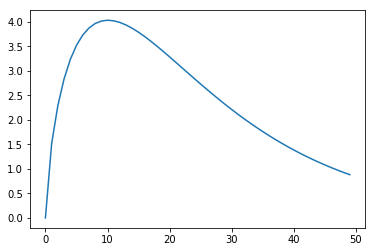

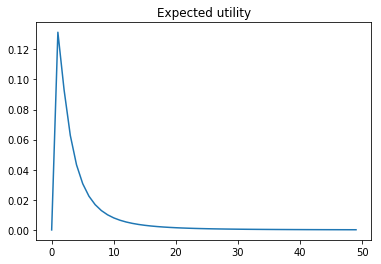

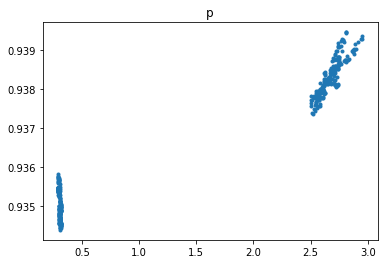

In [107]:
import matplotlib.pyplot as plt
plt.plot([player.expected_utility(rewards, i) for i in range(i_max)])
plt.show()
plt.plot(samples['expected_utilities'][-1])
plt.title('Expected utility')
plt.show()
plt.plot(samples['a0']/samples['m0'],samples['p'],'.')
plt.title('p')
plt.show()

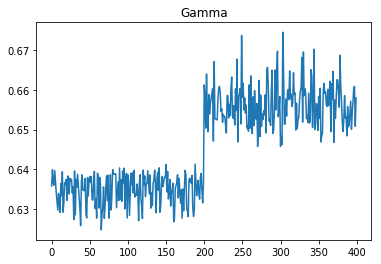

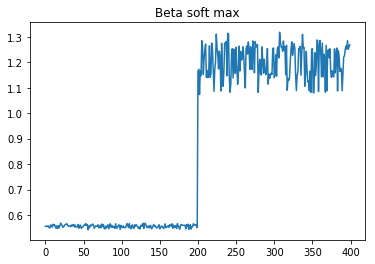

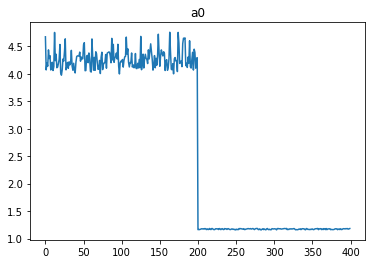

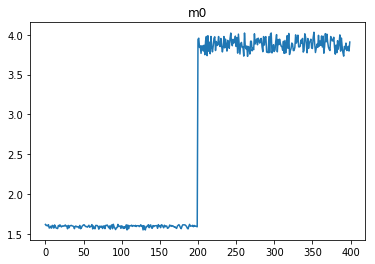

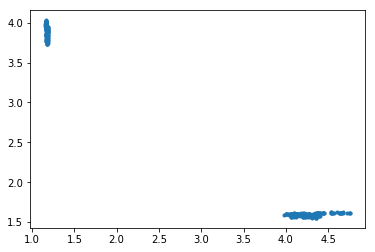

In [108]:
import matplotlib.pyplot as plt
plt.plot(samples['gamma_pos'])
plt.title('Gamma')
plt.show()
plt.plot(samples['beta_soft_max'])
plt.title('Beta soft max')
plt.show()
plt.plot(samples['a0'])
plt.title('a0')
plt.show()
plt.plot(samples['m0'])
plt.title('m0')
plt.show()

plt.plot(samples['a0'],samples['m0'],'.')
plt.show()

In [109]:
print('Mean of gamma: ', np.mean(samples['gamma_pos']))
print('Mean of a0: ', np.mean(samples['a0']))
print('Mean of m0: ', np.mean(samples['m0']))
print('Mean of a0/m0: ', np.mean(samples['a0']/(samples['m0']+samples['a0'])), 
      ' true value: ', player.a0 / (player.m0+player.a0))

Mean of gamma:  0.645518974243
Mean of a0:  2.71937547586
Mean of m0:  2.7368815413
Mean of a0/m0:  0.479910251053  true value:  0.7894736842105263


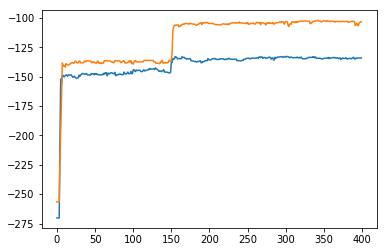

In [110]:
log_posteriors = fit.get_logposterior()
for log_posterior in log_posteriors:
    plt.plot(log_posterior)
plt.show()